# Fake News Detection

### Alert! Did you know that your morning start with fake news. Yes, as per my survey I found that more then 50% of fake new viral in every year. 

# What is fake news?
## As per google defination -"false information that is broadcast or published as news for fraudulent or politically motivated purposes"
### Fake news's simple meaning is to incorporate information that leads people to the wrong path. Nowadays fake news spreading like water and people share this information without verifying it. This is often done to further or impose certain ideas and is often achieved with political agendas.

### For media outlets, the ability to attract viewers to their websites is necessary to generate online advertising revenue. So it is necessary to detect fake news.


# Workflow~

# 1 Insert DataSet

In [2]:
import pandas as pd
import matplotlib.pyplot as mtp
import seaborn as sns
import numpy as np

%matplotlib inline


I found that datasets for fake news detection on Kaggle. There are two datasets one for fake news and one for true news. In true news, there is 426 news, and in fake news, there is 378 news. Both datasets have a label column in which 1 for fake news and 0 for true news. We are combined both datasets using pandas built-in function.

In [3]:
df=pd.read_csv('FA-KES-Dataset.csv',encoding='unicode_escape' )

In [4]:
df.head()

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0


In [5]:
df.shape

(804, 7)

In [6]:
df

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0
...,...,...,...,...,...,...,...
799,1965511221,Turkish Bombardment Kills 20 Civilians in Syria,28-08-2016 Turkish Bombardment Kills 20 Civili...,manar,8/28/2016,aleppo,1
800,1965511222,Martyrs as Terrorists Shell Aleppos Salah Eddin,17-08-2016 Martyrs as Terrorists Shell Aleppos...,manar,8/1/2016,aleppo,1
801,1965511224,Chemical Attack Kills Five Syrians in Aleppo SANA,03-08-2016 Chemical Attack Kills Five Syrians ...,manar,8/3/2016,aleppo,0
802,1965511226,5 Killed as Russian Military Chopper Shot down...,01-08-2016 5 Killed as Russian Military Choppe...,manar,8/1/2016,idlib,1


In [7]:
df.isnull().sum()

unit_id            0
article_title      0
article_content    0
source             0
date               0
location           0
labels             0
dtype: int64

<AxesSubplot:>

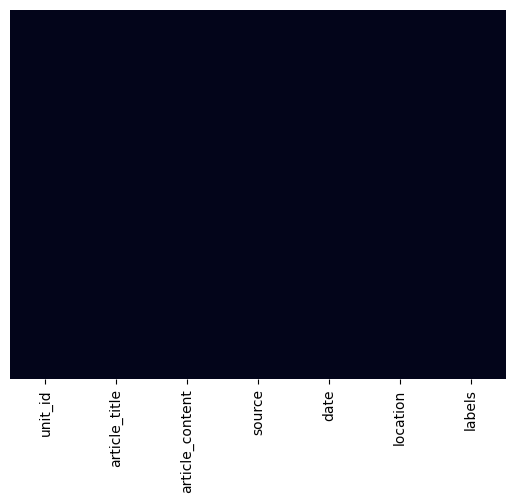

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

 # 2 Date Pre processing

In [9]:
pd.to_datetime(df['date'])
df['year']=pd.DatetimeIndex(df['date']).year
df.head()

,unit_id,article_title,article_content,source,date,location,labels,year
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0,2017
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0,2017
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0,2017
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0,2017
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0,2016


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unit_id          804 non-null    int64 
 1   article_title    804 non-null    object
 2   article_content  804 non-null    object
 3   source           804 non-null    object
 4   date             804 non-null    object
 5   location         804 non-null    object
 6   labels           804 non-null    int64 
 7   year             804 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 50.4+ KB


In [11]:
df['article_title_length']=df['article_title'].apply(len)
df['article_title_length']

0      57
1      76
2      47
3      43
4      52
       ..
799    47
800    47
801    49
802    55
803    50
Name: article_title_length, Length: 804, dtype: int64

# 3 Exploratory Data Analysis
## Lets Find out in which most fake news were released.


In [12]:
print("Dataset from year",df.year.min() ,"to", df.year.max())

Dataset from year 2011 to 2018


Text(0, 0.5, 'Number of data in Dataset')

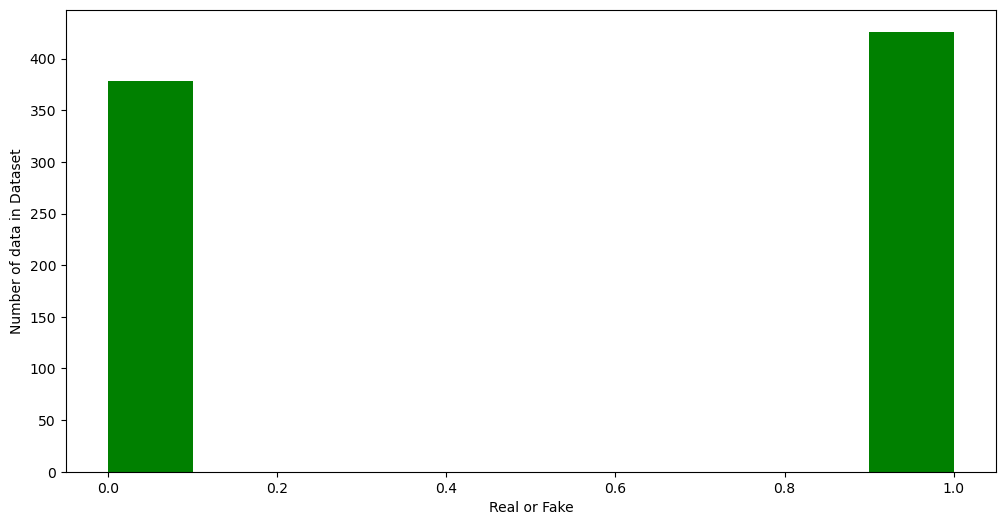

In [13]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)

mtp.hist(df.labels,color='green')
mtp.xlabel('Real or Fake')
mtp.ylabel('Number of data in Dataset')

                        As per the above output, the dataset contains 426 real news where as 378 fake news data

<AxesSubplot:xlabel='source', ylabel='count'>

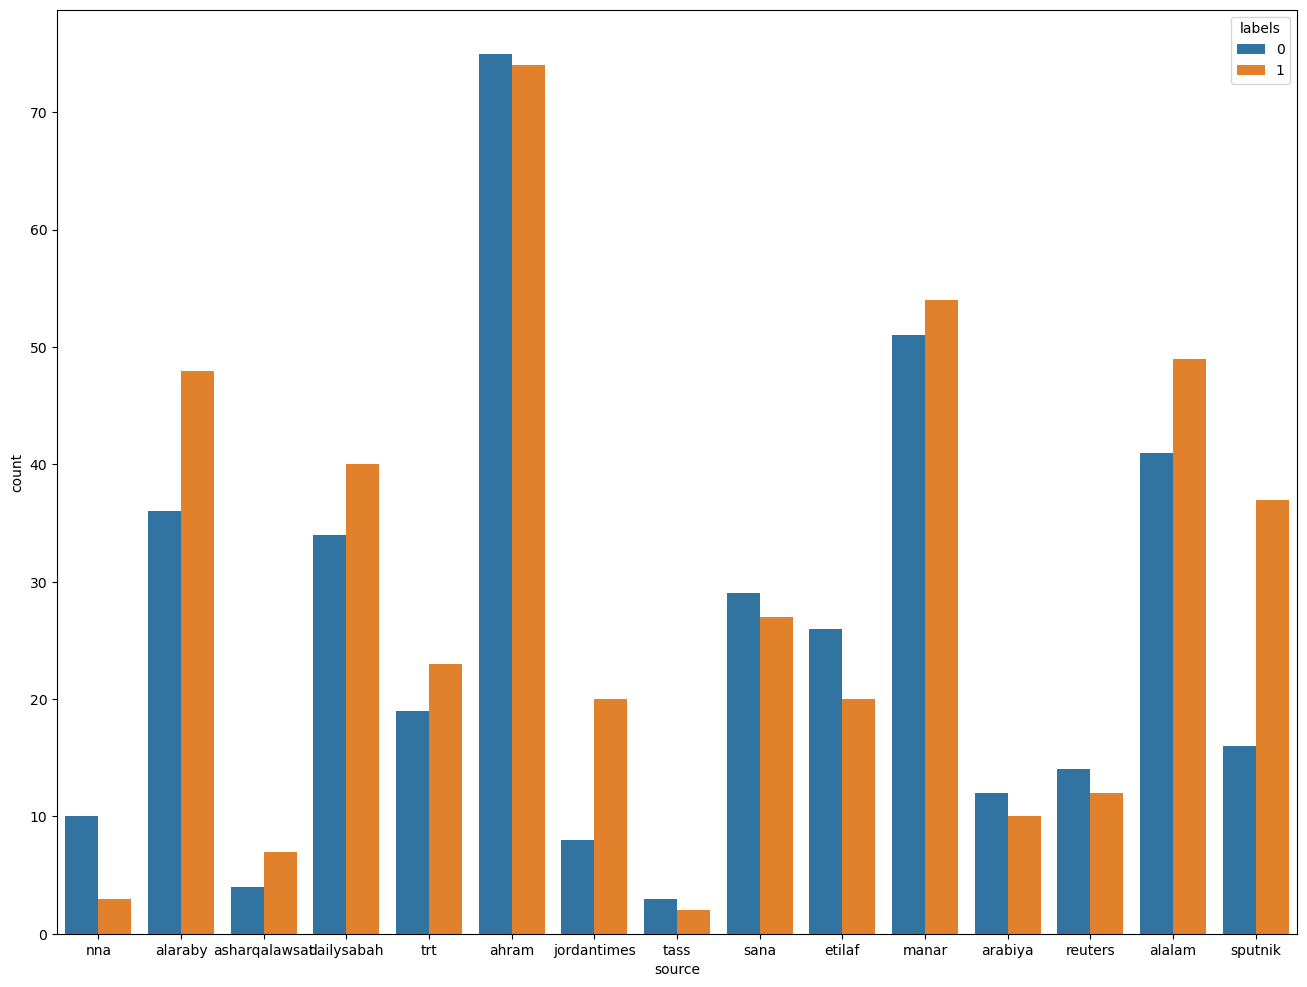

In [14]:
matplotlib.rcParams['figure.figsize']=(16,12)
sns.countplot(x=df.source,hue=df.labels)

The sources named as 'nna', 'ahram',, tass source', 'sana','etllaf', 'arabia'and 'reuters' has given more number of fake news than the real news.

In [15]:
print("Number of fake Articles:", len(df.loc[df['labels'] == 1]))
print("Number of real Articles:", len(df.loc[df['labels'] == 0]))
fake_df=df.loc[df.labels==0]
real_df=df.loc[df.labels==1]

Number of fake Articles: 426
Number of real Articles: 378


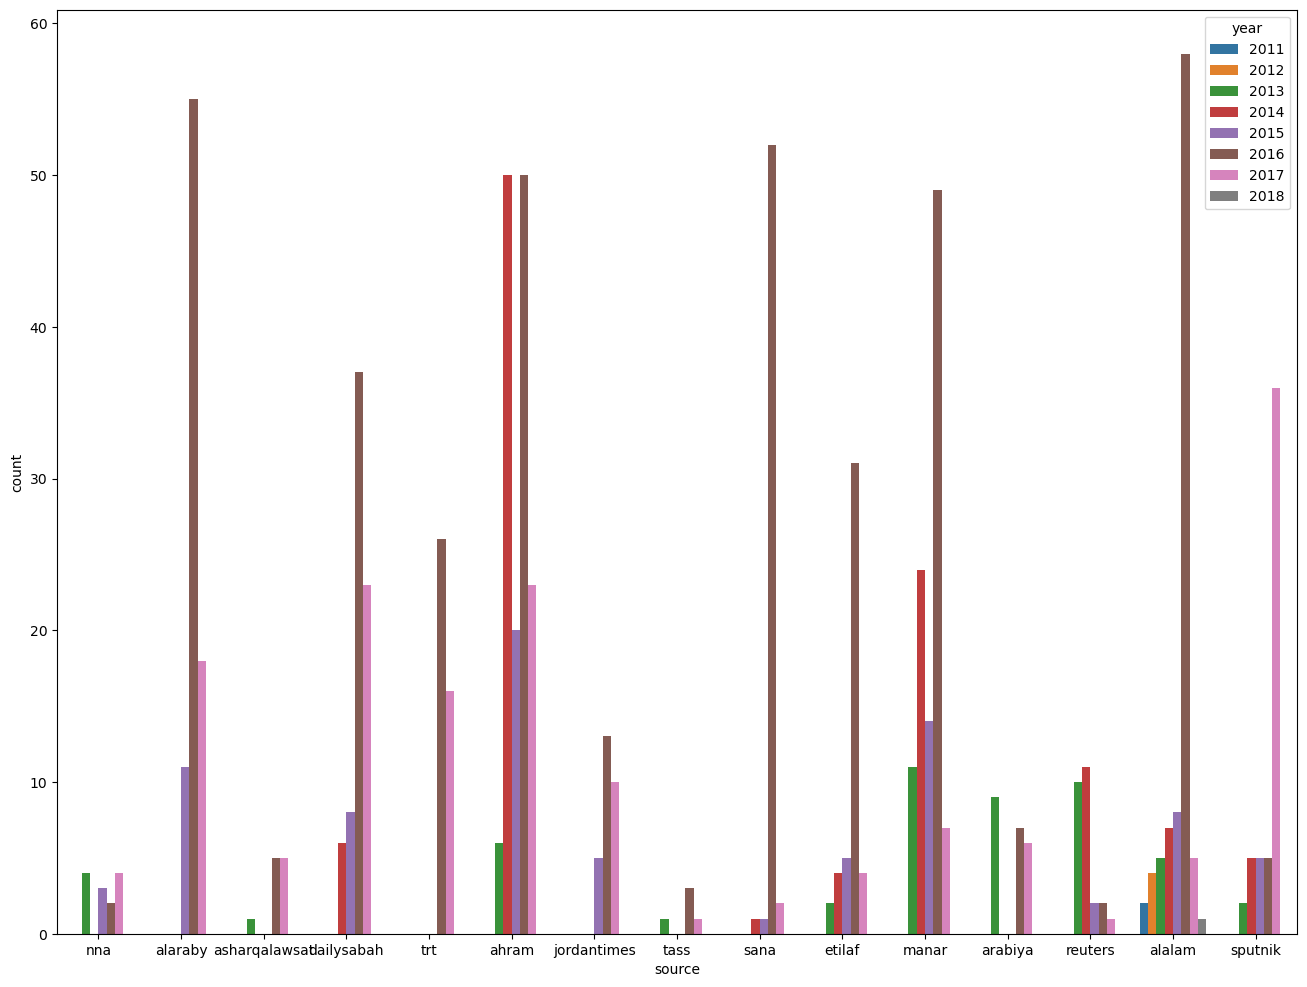

In [16]:
sns.countplot(x=df.source,hue=df.year,data =df);

The above graph shows the year wise number of news released by the various sources. One thing that can also be infered out of the graph is that the maximum number of news were released in 2016, by the various sources

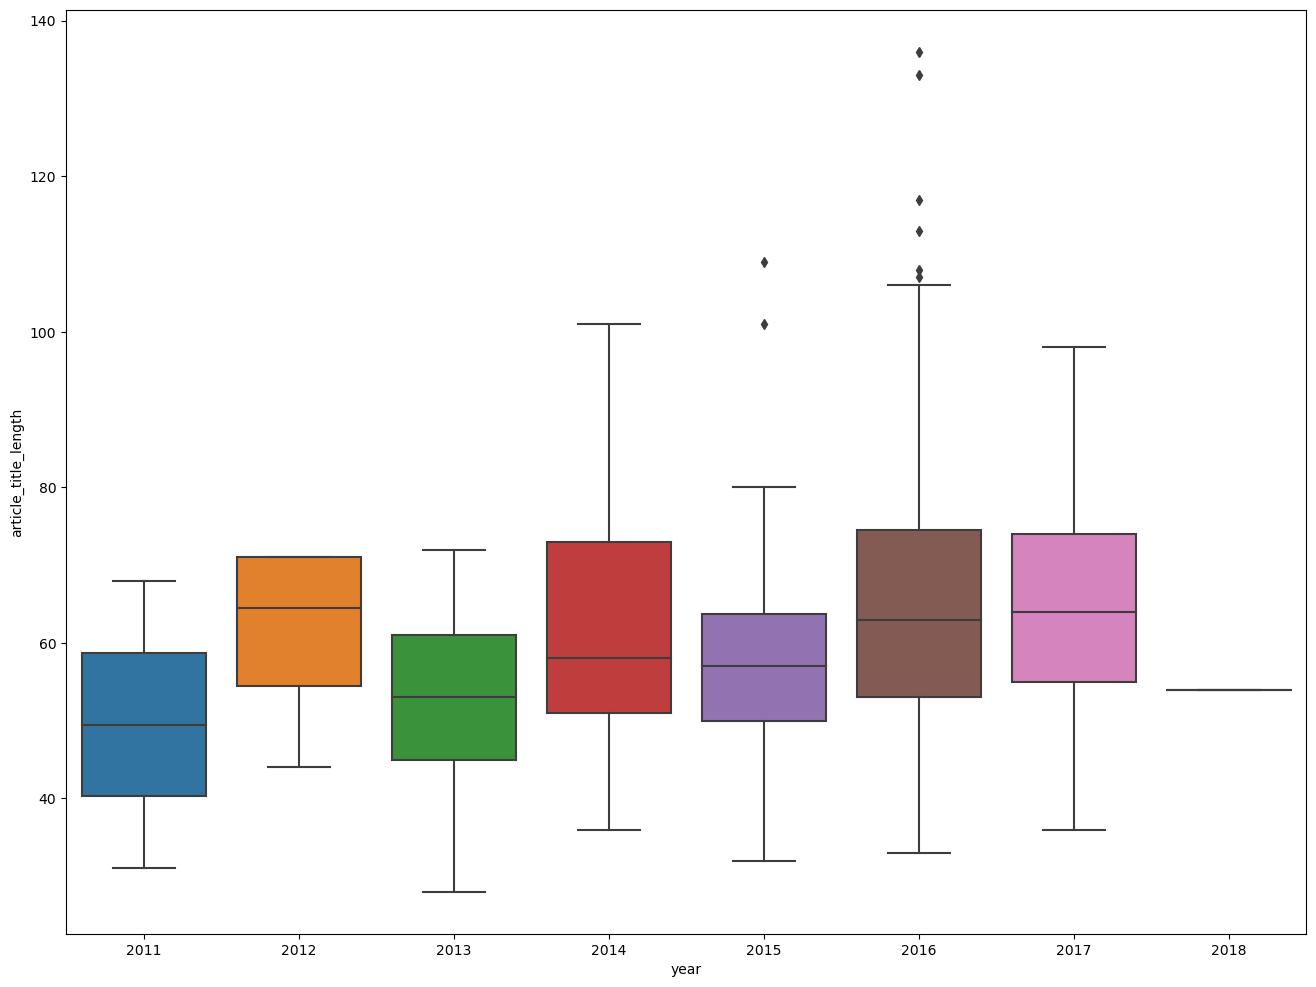

In [17]:
sns.boxplot(y='article_title_length',x='year',data=df);

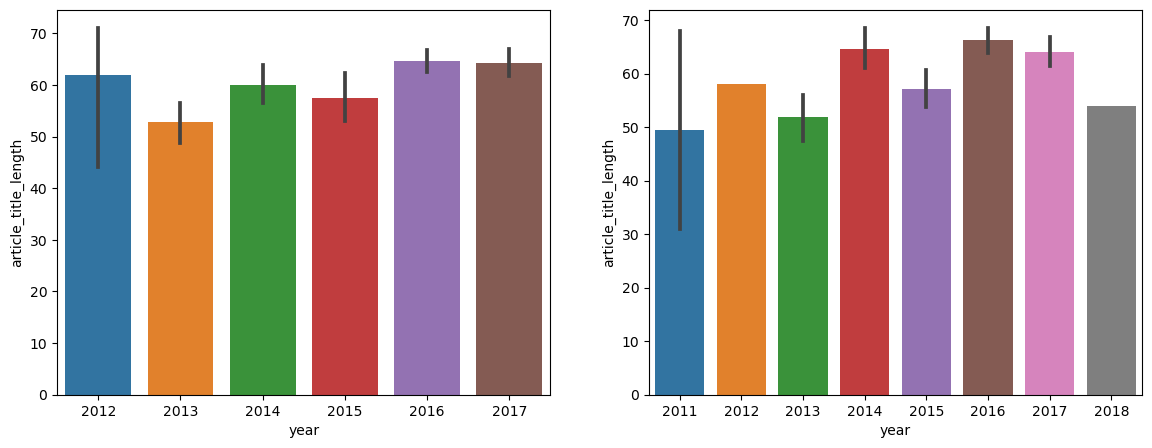

In [18]:
figure, axis = mtp.subplots(1,2,figsize=(14,5))
sns.barplot(ax=axis[0],y='article_title_length',x='year',data=real_df);
sns.barplot(ax=axis[1],y='article_title_length',x='year',data=fake_df);
mtp.show()

# 4. Split the Data

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
x=np.array(df['article_title'])
x.reshape(-1, 1)
y=np.array(df['labels'])

cv = CountVectorizer()
x = cv.fit_transform(x)


In [44]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label=train_test_split(x,y,test_size=0.3,random_state=42)
# splitting data into train and test data 70%-30%

### Use the Multinomial Naive Bayes algorithm to train the fake news detection model

In [46]:
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB()
model.fit(train_data,train_label)
print(model.score(train_data, train_label))

0.8380782918149466


In [47]:
news_headline = "CA Exams 2021: Supreme Court asks ICAI to extend opt-out option for July exams, final order tomorrow"
data = cv.transform([news_headline]).toarray()
print(model.predict(data))

[0]


In [48]:
news_headline = "Cow dung can cure Corona Virus"
data = cv.transform([news_headline]).toarray()
print(model.predict(data))

[1]


### 0 -> Real || 1 -> Fake 